In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from missingpy import MissForest
plt.style.use('ggplot')

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [75]:
pip install missingpy

     |████████████████████████████████| 49 kB 502 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
data=pd.read_csv('prepared_data.csv')

In [4]:
dic=pd.read_csv('indi_to_use.csv')

In [5]:
dic

,Indicator Name,Indicator Code,pillars
0,Access to electricity (% of population),EG.ELC.ACCS.ZS,economic
1,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,social
2,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,social
3,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,environment
4,"Agriculture, forestry, and fishing, value adde...",NV.AGR.EMPL.KD,economic
...,...,...,...
58,"School enrollment, primary (gross), gender par...",SE.ENR.PRIM.FM.ZS,social
59,"Secondary education, duration (years)",SE.SEC.DURS,social
60,"Services, value added per worker (constant 201...",NV.SRV.EMPL.KD,economic
61,Total fisheries production (metric tons),ER.FSH.PROD.MT,environment


In [6]:
data

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,year,country,score
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267,1990,ARG,0.771
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549,1990,AUS,0.336
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409,1990,AUT,0.680
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033,1990,BDI,0.322
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597,1990,BEL,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501,2018,LSO,0.550
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901,2018,LTU,0.290
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536,2018,LVA,0.535
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778,2018,SLV,0.721


In [8]:
X=data.drop(['score','country','year'],axis=1)

In [9]:
X

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,0.293643,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778


/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1215: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

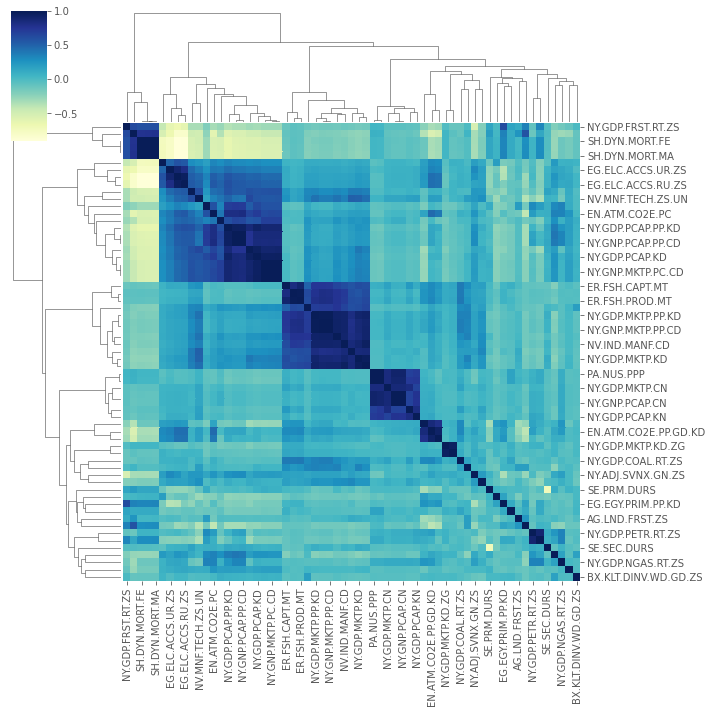

In [11]:
plt.figure(figsize=(10,10))
sns.clustermap(X.corr(),cmap="YlGnBu",cbar=True,square=True);

In [12]:
corr_feature=np.abs(X.corrwith(data['score'])).sort_values(ascending=False)

In [15]:
top20_feature=list(corr_feature[:20].index)

In [16]:
top20_feature

['NY.GNP.MKTP.PC.CD',
 'NY.GNP.PCAP.CD',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.KD',
 'NY.GNP.PCAP.PP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NV.SRV.EMPL.KD',
 'NY.GDP.PCAP.PP.KD',
 'EN.ATM.CO2E.PC',
 'SE.PRM.DURS',
 'NV.IND.EMPL.KD',
 'EG.EGY.PRIM.PP.KD',
 'IT.NET.USER.ZS',
 'EG.ELC.ACCS.UR.ZS',
 'NY.GDP.FRST.RT.ZS',
 'EG.ELC.ACCS.ZS',
 'EG.FEC.RNEW.ZS',
 'EN.ATM.CO2E.KD.GD',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT']

In [17]:
import_to_tableau=X.corrwith(data['score'])[top20_feature]

In [18]:
import_to_tableau.to_csv('top_20_feature.csv')

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

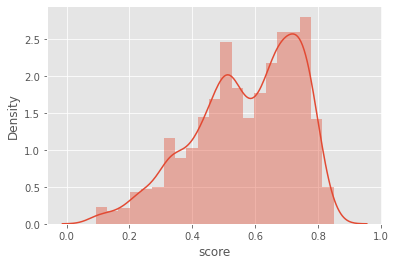

In [26]:
sns.distplot(data['score'])

In [31]:
data.drop(['NY.GNP.PCAP.CD','NY.GDP.PCAP.KD',
 'NY.GNP.PCAP.PP.CD',
 'NY.GDP.PCAP.PP.CD','NY.GDP.PCAP.PP.KD'],axis=1,inplace=True)

In [33]:
X=data.drop(['country','year','score'],axis=1)
X

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,0.293643,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778


In [34]:
corr_feature=np.abs(X.corrwith(data['score'])).sort_values(ascending=False)

In [35]:
top20_feature=list(corr_feature[:20].index)

In [36]:
top20_feature

['NY.GNP.MKTP.PC.CD',
 'NY.GDP.PCAP.CD',
 'NV.SRV.EMPL.KD',
 'EN.ATM.CO2E.PC',
 'SE.PRM.DURS',
 'NV.IND.EMPL.KD',
 'EG.EGY.PRIM.PP.KD',
 'IT.NET.USER.ZS',
 'EG.ELC.ACCS.UR.ZS',
 'NY.GDP.FRST.RT.ZS',
 'EG.ELC.ACCS.ZS',
 'EG.FEC.RNEW.ZS',
 'EN.ATM.CO2E.KD.GD',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT',
 'SH.DYN.MORT.MA',
 'SE.ENR.PRIM.FM.ZS',
 'BX.TRF.PWKR.DT.GD.ZS',
 'EG.ELC.ACCS.RU.ZS',
 'NV.IND.MANF.ZS']

In [37]:
import_to_tableau=X.corrwith(data['score'])[top20_feature]

In [38]:
import_to_tableau.to_csv('top_20_feature.csv')

In [41]:
all_features=list(X.columns)

In [42]:
all_features

['EG.ELC.ACCS.ZS',
 'EG.ELC.ACCS.RU.ZS',
 'EG.ELC.ACCS.UR.ZS',
 'NY.ADJ.SVNX.GN.ZS',
 'NV.AGR.EMPL.KD',
 'IS.AIR.GOOD.MT.K1',
 'IS.AIR.PSGR',
 'ER.FSH.AQUA.MT',
 'ER.FSH.CAPT.MT',
 'AG.YLD.CREL.KG',
 'EN.ATM.CO2E.KD.GD',
 'EN.ATM.CO2E.PP.GD.KD',
 'EN.ATM.CO2E.PP.GD',
 'EN.ATM.CO2E.PC',
 'NY.GDP.COAL.RT.ZS',
 'EG.EGY.PRIM.PP.KD',
 'NE.EXP.GNFS.ZS',
 'BX.KLT.DINV.WD.GD.ZS',
 'BX.KLT.DINV.CD.WD',
 'AG.LND.FRST.ZS',
 'AG.LND.FRST.K2',
 'NY.GDP.FRST.RT.ZS',
 'NY.GDP.MKTP.KD',
 'NY.GDP.MKTP.KN',
 'NY.GDP.MKTP.CN',
 'NY.GDP.MKTP.CD',
 'NY.GDP.MKTP.KD.ZG',
 'NY.GDP.PCAP.KN',
 'NY.GDP.PCAP.CN',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.KD.ZG',
 'NY.GDP.MKTP.PP.KD',
 'NY.GDP.MKTP.PP.CD',
 'NY.GNP.PCAP.CN',
 'NY.GNP.MKTP.PC.CD',
 'NY.GNP.MKTP.PP.CD',
 'IT.NET.USER.ZS',
 'NV.IND.EMPL.KD',
 'NV.IND.MANF.ZS',
 'NV.IND.MANF.CD',
 'NV.MNF.TECH.ZS.UN',
 'NY.GDP.MINR.RT.ZS',
 'SH.DYN.MORT',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT.MA',
 'NY.GDP.NGAS.RT.ZS',
 'NY.GDP.PETR.RT.ZS',
 'BX.TRF.PWKR.DT.GD.ZS',
 'PA.NUS.PPP',
 

In [55]:
env_columns=list(dic[dic['pillars']=='environment']['Indicator Code'].values)

In [56]:
social_columns=list(dic[dic['pillars']=='social']['Indicator Code'].values)

In [57]:
eco_columns=list(dic[dic['pillars']=='economic']['Indicator Code'].values)

In [62]:
eco_columns.remove('NY.GNP.PCAP.CD')

In [64]:
eco_columns.remove('NY.GNP.PCAP.PP.CD')

In [65]:
eco_columns.remove('NY.GDP.PCAP.PP.CD')

In [66]:
eco_columns.remove('NY.GDP.PCAP.PP.KD')

In [70]:
data.to_csv('prepared_data.csv',index=False)

In [85]:
data=pd.read_csv('prepared_data.csv')

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1215: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

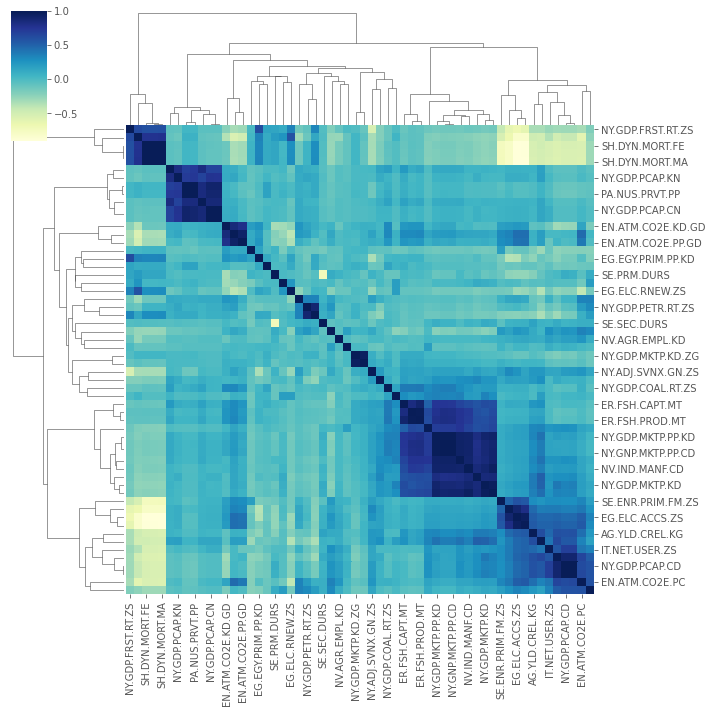

In [72]:
plt.figure(figsize=(10,10))
sns.clustermap(X.corr(),cmap="YlGnBu",cbar=True,square=True);

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

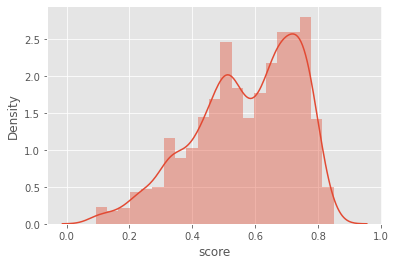

In [73]:
sns.distplot(data['score'])

In [74]:
X

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,0.293643,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778


## Missing value imputation (missforest)

In [78]:
imputer = MissForest(verbose=1)
X_imputed = imputer.fit_transform(X)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parall

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

Iteration: 0


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=

Iteration: 1


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=

Iteration: 2


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=

Iteration: 3


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [80]:
X_imputed.shape

(2258, 58)

In [82]:
X=X_imputed

In [83]:
X

array([[8.34257063e+01, 6.87875526e+01, 9.40248873e+01, ...,
        1.33397120e+04, 5.61157000e+05, 2.58726669e+00],
       [1.00000000e+02, 1.00000000e+02, 9.99171524e+01, ...,
        6.63933452e+04, 2.49906000e+05, 3.48454898e+00],
       [1.00000000e+02, 1.00000000e+02, 9.98986893e+01, ...,
        7.28393557e+04, 3.65900000e+03, 2.55408692e-01],
       ...,
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        3.08173484e+04, 1.36296656e+05, 9.80535706e-01],
       [1.00000000e+02, 1.00000000e+02, 9.89563751e+01, ...,
        8.50788013e+03, 6.22970000e+04, 6.55778352e-01],
       [7.65039825e+01, 7.01845826e+01, 9.67378082e+01, ...,
        1.53832849e+04, 1.65000000e+02, 3.06402631e+00]])

In [89]:
X_=data.drop(['country','year','score'],axis=1)

In [91]:
X_

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,NaN,NaN,NaN,5.870945,NaN,213.600006,5369100.0,300.000000,560857.0,2250.8,...,0.293643,NaN,7.0,35.441466,8.922907,0.98350,5.0,NaN,561157.000000,2.587267
1,100.000000,100.000000,99.917152,9.242528,NaN,1222.300049,17553400.0,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.99717,6.0,NaN,249906.000000,3.484549
2,100.000000,100.000000,99.898689,NaN,NaN,53.900002,2532100.0,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.99623,8.0,NaN,3659.000000,0.255409
3,NaN,NaN,NaN,-17.242979,NaN,NaN,8300.0,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.80117,7.0,NaN,17425.000000,13.371033
4,100.000000,100.000000,99.898689,NaN,NaN,656.400024,3132700.0,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.01820,6.0,NaN,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,NaN,NaN,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,NaN,NaN,NaN,5.0,5927.386035,2552.459961,3.275501
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,26031.0,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,NaN,NaN,1.00032,8.0,32344.017737,78133.093750,0.365901
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4058762.0,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,NaN,NaN,1.00484,6.0,30817.348415,136296.656250,0.980536
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2545105.0,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,NaN,NaN,0.96830,6.0,8507.880128,62297.000000,0.655778


In [92]:
col_names=list(X_.columns)

In [94]:
X=pd.DataFrame(X,columns=col_names)

In [96]:
X['country']=data['country']

In [97]:
X['year']=data['year']

In [98]:
X['score']=data['score']

In [100]:
X.to_csv('missforest.csv',index=False)

In [101]:
pd.read_csv('missforest.csv')

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,country,year,score
0,83.425706,68.787553,94.024887,5.870945,109093.887502,213.600006,5.369100e+06,300.000000,560857.0,2250.8,...,35.441466,8.922907,0.983500,5.0,13339.711953,561157.000000,2.587267,ARG,1990,0.771
1,100.000000,100.000000,99.917152,9.242528,42874.229466,1222.300049,1.755340e+07,12401.000000,237505.0,1716.1,...,9.656031,8.009577,0.997170,6.0,66393.345249,249906.000000,3.484549,AUS,1990,0.336
2,100.000000,100.000000,99.898689,9.365596,17265.163935,53.900002,2.532100e+06,3126.000000,533.0,5577.3,...,66.202126,25.135754,0.996230,8.0,72839.355666,3659.000000,0.255409,AUT,1990,0.680
3,25.476960,9.020366,72.186022,-17.242979,462.804471,9.703431,8.300000e+03,30.000000,17395.0,1348.5,...,98.181818,95.200672,0.801170,7.0,4455.308571,17425.000000,13.371033,BDI,1990,0.322
4,100.000000,100.000000,99.898689,15.715762,23581.619826,656.400024,3.132700e+06,675.000000,41460.0,5755.1,...,0.789564,1.269461,1.018200,6.0,82271.465624,42135.000000,0.045597,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,9.087312,1.375099e+05,2500.459961,52.0,755.8,...,66.361799,53.204810,0.943512,5.0,5927.386035,2552.459961,3.275501,LSO,2018,0.550
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,2.603100e+04,3750.090088,74383.0,3181.2,...,27.488075,22.921635,1.000320,8.0,32344.017737,78133.093750,0.365901,LTU,2018,0.290
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4.058762e+06,829.659973,135467.0,3026.2,...,41.519758,29.985718,1.004840,6.0,30817.348415,136296.656250,0.980536,LVA,2018,0.535
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2.545105e+06,8600.000000,53697.0,2379.7,...,49.053730,29.096162,0.968300,6.0,8507.880128,62297.000000,0.655778,SLV,2018,0.721


In [102]:
data=pd.read_csv('missforest.csv')

In [103]:
X=data.drop(['country','year','score'],axis=1)

In [104]:
X

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,83.425706,68.787553,94.024887,5.870945,109093.887502,213.600006,5.369100e+06,300.000000,560857.0,2250.8,...,0.293643,0.426022,7.0,35.441466,8.922907,0.983500,5.0,13339.711953,561157.000000,2.587267
1,100.000000,100.000000,99.917152,9.242528,42874.229466,1222.300049,1.755340e+07,12401.000000,237505.0,1716.1,...,1.365519,1.386268,6.0,9.656031,8.009577,0.997170,6.0,66393.345249,249906.000000,3.484549
2,100.000000,100.000000,99.898689,9.365596,17265.163935,53.900002,2.532100e+06,3126.000000,533.0,5577.3,...,0.922246,0.940839,4.0,66.202126,25.135754,0.996230,8.0,72839.355666,3659.000000,0.255409
3,25.476960,9.020366,72.186022,-17.242979,462.804471,9.703431,8.300000e+03,30.000000,17395.0,1348.5,...,71.148254,81.714115,6.0,98.181818,95.200672,0.801170,7.0,4455.308571,17425.000000,13.371033
4,100.000000,100.000000,99.898689,15.715762,23581.619826,656.400024,3.132700e+06,675.000000,41460.0,5755.1,...,0.915381,0.975761,6.0,0.789564,1.269461,1.018200,6.0,82271.465624,42135.000000,0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,47.000000,37.713245,70.700000,9.947512,358.660735,9.087312,1.375099e+05,2500.459961,52.0,755.8,...,5.743313,5.362195,7.0,66.361799,53.204810,0.943512,5.0,5927.386035,2552.459961,3.275501
2254,100.000000,100.000000,100.000000,11.151911,12261.992755,0.000000,2.603100e+04,3750.090088,74383.0,3181.2,...,0.433085,0.473127,4.0,27.488075,22.921635,1.000320,8.0,32344.017737,78133.093750,0.365901
2255,100.000000,100.000000,100.000000,5.208358,16351.364972,4.014870,4.058762e+06,829.659973,135467.0,3026.2,...,0.475959,0.537914,6.0,41.519758,29.985718,1.004840,6.0,30817.348415,136296.656250,0.980536
2256,100.000000,100.000000,98.956375,3.975769,2718.515369,10.733220,2.545105e+06,8600.000000,53697.0,2379.7,...,0.460901,0.508201,6.0,49.053730,29.096162,0.968300,6.0,8507.880128,62297.000000,0.655778


In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
 scaler = MinMaxScaler()

In [109]:
X=pd.DataFrame(scaler.fit_transform(X),columns=col_names)

In [111]:
X['country']=data['country']
X['year']=data['year']
X['score']=data['score']

In [112]:
X.to_csv('minmaxscaler.csv',index=False)

In [113]:
pd.read_csv('minmaxscaler.csv')

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS,country,year,score
0,0.832170,0.687815,0.939779,0.703273,0.038342,0.008457,0.008781,4.536172e-06,0.033689,0.101529,...,0.354415,0.090733,0.698498,0.2,0.110626,0.006930,0.038094,ARG,1990,0.771
1,1.000000,1.000000,0.999165,0.726205,0.015026,0.048396,0.028708,1.875102e-04,0.014266,0.077037,...,0.096560,0.081446,0.716730,0.4,0.566583,0.003086,0.051306,AUS,1990,0.336
2,1.000000,1.000000,0.998979,0.727043,0.006010,0.002134,0.004141,4.726691e-05,0.000032,0.253903,...,0.662021,0.255594,0.715477,0.8,0.621982,0.000045,0.003761,AUT,1990,0.680
3,0.245387,0.090028,0.719675,0.546057,0.000094,0.000384,0.000014,4.536172e-07,0.001045,0.060198,...,0.981818,0.968051,0.455320,0.6,0.034272,0.000215,0.196871,BDI,1990,0.322
4,1.000000,1.000000,0.998979,0.770235,0.008234,0.025990,0.005123,1.020639e-05,0.002490,0.262047,...,0.007896,0.012909,0.744778,0.4,0.703044,0.000520,0.000671,BEL,1990,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,0.463327,0.377012,0.704698,0.731001,0.000057,0.000360,0.000225,3.780839e-05,0.000003,0.033049,...,0.663618,0.541015,0.645165,0.2,0.046923,0.000031,0.048228,LSO,2018,0.550
2254,1.000000,1.000000,1.000000,0.739193,0.004248,0.000000,0.000043,5.670351e-05,0.004468,0.144147,...,0.274881,0.233079,0.720931,0.8,0.273955,0.000965,0.005387,LTU,2018,0.290
2255,1.000000,1.000000,1.000000,0.698766,0.005688,0.000159,0.006638,1.254493e-05,0.008137,0.137047,...,0.415198,0.304911,0.726960,0.4,0.260834,0.001683,0.014437,LVA,2018,0.535
2256,1.000000,1.000000,0.989482,0.690382,0.000888,0.000425,0.004162,1.300369e-04,0.003225,0.107433,...,0.490537,0.295865,0.678226,0.4,0.069100,0.000769,0.009655,SLV,2018,0.721


In [115]:
cca_full=X.drop(['country','year','score'],axis=1)

In [116]:
cca_full

,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.SVNX.GN.ZS,NV.AGR.EMPL.KD,IS.AIR.GOOD.MT.K1,IS.AIR.PSGR,ER.FSH.AQUA.MT,ER.FSH.CAPT.MT,AG.YLD.CREL.KG,...,PA.NUS.PPP,PA.NUS.PRVT.PP,SE.PRM.DURS,EG.ELC.RNEW.ZS,EG.FEC.RNEW.ZS,SE.ENR.PRIM.FM.ZS,SE.SEC.DURS,NV.SRV.EMPL.KD,ER.FSH.PROD.MT,NY.GDP.TOTL.RT.ZS
0,0.832170,0.687815,0.939779,0.703273,0.038342,0.008457,0.008781,4.536172e-06,0.033689,0.101529,...,0.000017,0.000027,0.666667,0.354415,0.090733,0.698498,0.2,0.110626,0.006930,0.038094
1,1.000000,1.000000,0.999165,0.726205,0.015026,0.048396,0.028708,1.875102e-04,0.014266,0.077037,...,0.000081,0.000086,0.500000,0.096560,0.081446,0.716730,0.4,0.566583,0.003086,0.051306
2,1.000000,1.000000,0.998979,0.727043,0.006010,0.002134,0.004141,4.726691e-05,0.000032,0.253903,...,0.000054,0.000059,0.166667,0.662021,0.255594,0.715477,0.8,0.621982,0.000045,0.003761
3,0.245387,0.090028,0.719675,0.546057,0.000094,0.000384,0.000014,4.536172e-07,0.001045,0.060198,...,0.004199,0.005087,0.500000,0.981818,0.968051,0.455320,0.6,0.034272,0.000215,0.196871
4,1.000000,1.000000,0.998979,0.770235,0.008234,0.025990,0.005123,1.020639e-05,0.002490,0.262047,...,0.000054,0.000061,0.500000,0.007896,0.012909,0.744778,0.4,0.703044,0.000520,0.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,0.463327,0.377012,0.704698,0.731001,0.000057,0.000360,0.000225,3.780839e-05,0.000003,0.033049,...,0.000339,0.000334,0.666667,0.663618,0.541015,0.645165,0.2,0.046923,0.000031,0.048228
2254,1.000000,1.000000,1.000000,0.739193,0.004248,0.000000,0.000043,5.670351e-05,0.004468,0.144147,...,0.000026,0.000029,0.166667,0.274881,0.233079,0.720931,0.8,0.273955,0.000965,0.005387
2255,1.000000,1.000000,1.000000,0.698766,0.005688,0.000159,0.006638,1.254493e-05,0.008137,0.137047,...,0.000028,0.000033,0.500000,0.415198,0.304911,0.726960,0.4,0.260834,0.001683,0.014437
2256,1.000000,1.000000,0.989482,0.690382,0.000888,0.000425,0.004162,1.300369e-04,0.003225,0.107433,...,0.000027,0.000032,0.500000,0.490537,0.295865,0.678226,0.4,0.069100,0.000769,0.009655


In [120]:
len(eco_columns)+len(env_columns)+len(social_columns)

58

In [121]:
eco_data=cca_full[eco_columns]

In [122]:
env_data=cca_full[env_columns]

In [123]:
social_data=cca_full[social_columns]

In [128]:
eco_data.to_csv('eco_data.csv',index=False)
social_data.to_csv('social_data.csv',index=False)
env_data.to_csv('env_data.csv',index=False)

In [ ]:
d